# Introduction

Maple Leaves Ltd is a start-up company which makes herbs from different types of plants and its leaves. Currently the system they use to classify the trees which they import in a batch is quite manual. A labor from his experience decides the leaf type and subtype of plant family. They have asked us to automate this process and remove any manual intervention from this process.

## Objective

To classify the plant leaves by various classifiers from different metrics of the leaves and to choose the best classifier for future reference.

## Let's Start

The first step would be to look at the data that we are working with. Most data-sets can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Let's start by reading the data into a pandas data frame.

In [3]:
import pandas as pd

url = 'H:\\ML Practice\\Maple\\train.csv'
leaves_data = pd.read_csv(url)
leaves_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


From our reading of the first 5 rows of the data, we can say that our data set has 192 columns that define the features of the leaves and each species is classified based on these features.
The next step would be to check if the data contains missing values. The missing values would be indicated by 'NA'. Thus, we will now tell pandas to treat rows with NA as missing values.

In [17]:
leaves_data = pd.read_csv(url, na_values=['NA'])

Next, it's always a good idea to look at the distribution of our data — especially the outliers.

Let's start by printing out some summary statistics about the data set.

In [5]:
leaves_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


From the first row, we can see that no data is missing from our data set. There are a total of 990 training examples.

Now it is time to do some pre-processing on our data. 

We see that we need to classify leaves based on their species. But the data type of the column 'Species' is string. We need that to be numeric. Moreover, the data may be skewed. In order to deal with this, we need to normalize all the columns in order to make better analysis and predictions.

In [18]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
leaves_data['species'] = le.fit_transform(leaves_data['species'])

In [7]:
leaves_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


We have completed our first step of preprocessing, ie, converting all of our data into numeric data. 

Now, let's split our data into train and test sets.

In [8]:
from sklearn.model_selection import train_test_split

In [19]:
cols = [col for col in leaves_data.columns if col not in ['id','species']] 

In [22]:
data = leaves_data[cols]
target = leaves_data['species']

In [34]:
data=(data-data.mean())/data.std()

In [31]:
data.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


Thus, after seperating our Leaves Data into train data and target data, ie, the species, we have normalized our trainig data.  

Now let's split the data and train it using various different models.

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.20, random_state = 10)

## Using Naive Bayes Model

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred_gnb = gnb.fit(x_train, y_train).predict(x_test)

## Using Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
pred_dtc = dtc.fit(x_train, y_train).predict(x_test)

## Using Linear Support Vector Classifier

In [33]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(random_state=0)
pred_svc_model = svc_model.fit(x_train, y_train).predict(x_test)

## Using Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 11)
pred_rfc = rfc.fit(x_train, y_train).predict(x_test)

## Time to check the accuracy of all the models

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print("Naive Bayes accuracy : ",accuracy_score(y_test, pred_gnb, normalize = True))
print("Decision Tree accuracy : ",accuracy_score(y_test, pred_dtc, normalize = True))
print("Linear SVM accuracy : ",accuracy_score(y_test, pred_svc_model, normalize = True))
print("Random Forest accuracy : ",accuracy_score(y_test, pred_rfc, normalize = True))

Naive Bayes accuracy :  0.5151515151515151
Decision Tree accuracy :  0.6060606060606061
Linear SVM accuracy :  0.7575757575757576
Random Forest accuracy :  0.8787878787878788


There is another method to know the performance of our classification Techniques. We will use Confusion Matrix.

In [49]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [63]:
nb_cfmat = confusion_matrix(y_test, pred_gnb)
dt_cfmat = confusion_matrix(y_test, pred_dtc)
svc_cfmat = confusion_matrix(y_test, pred_svc_model)
rf_cfmat = confusion_matrix(y_test, pred_rfc)

## Confusion Matrix for Naive Bayes Model

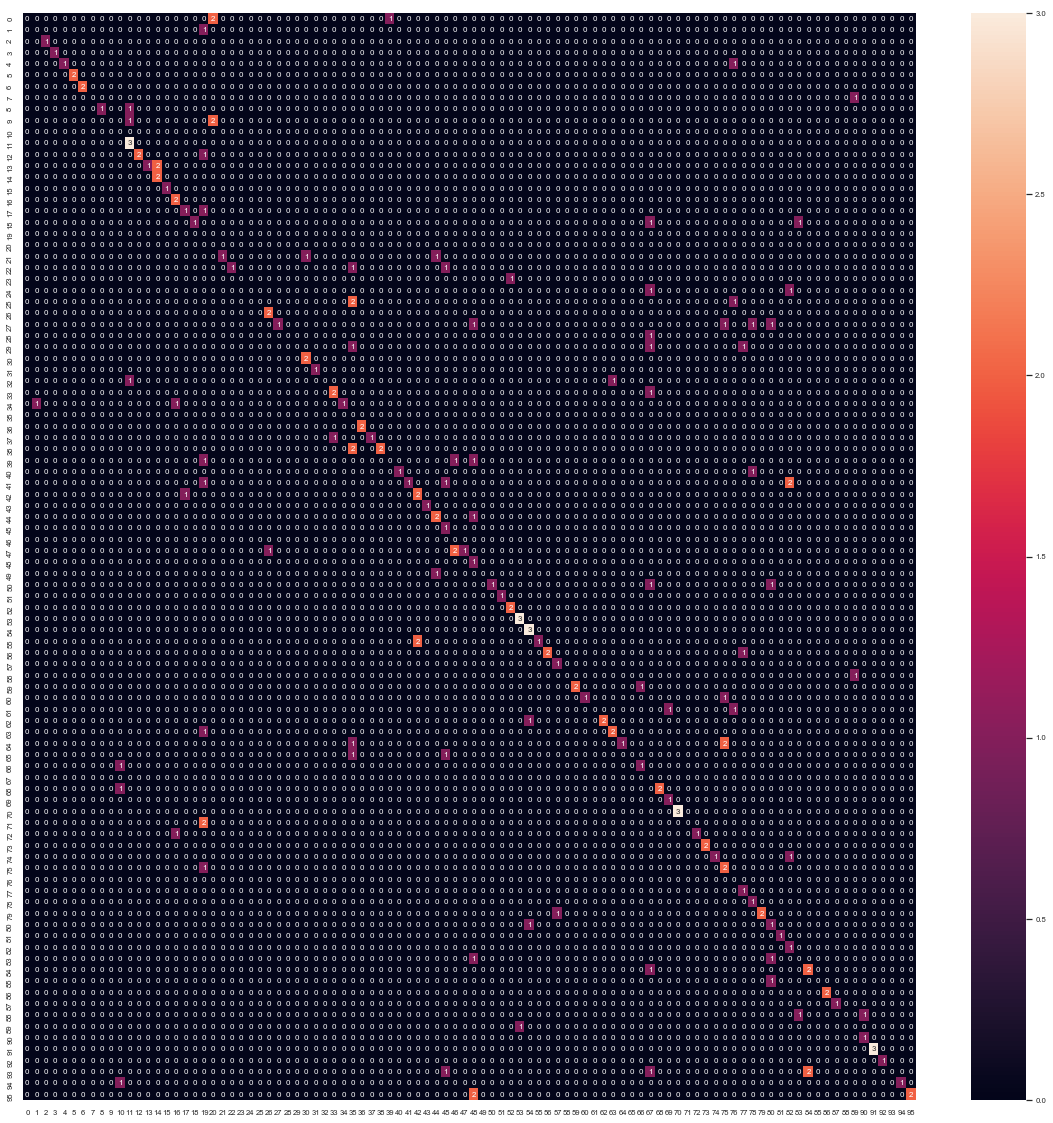

In [64]:
cf1 = pd.DataFrame(nb_cfmat, range(96), range(96))
fig, ax = plt.subplots(figsize=(20,20))
sn.set(font_scale=0.7)
sn.heatmap(cf1, annot=True,annot_kws={"size": 8},ax = ax)

## Confusion Matrix for Decision Tree Model

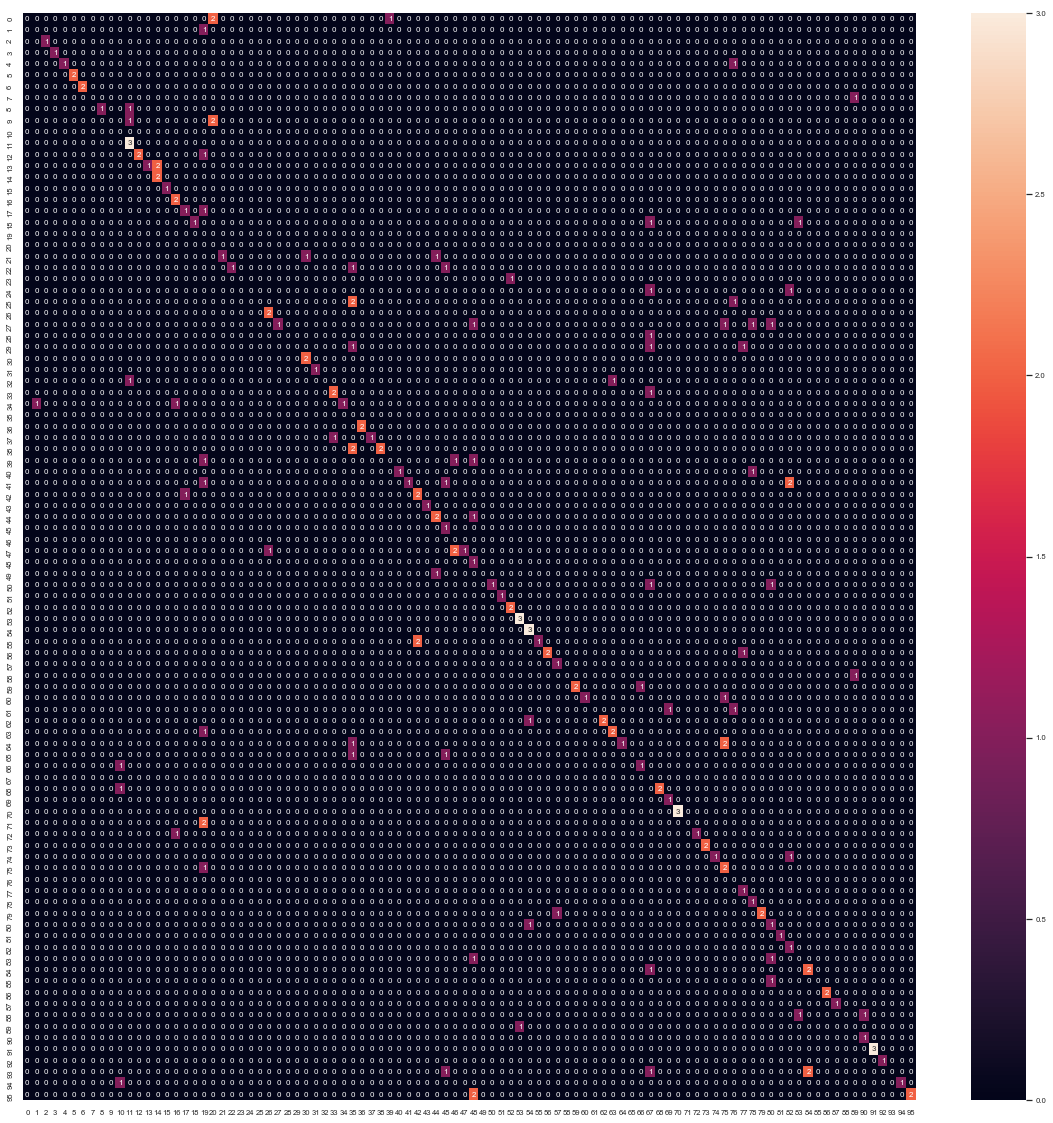

In [66]:
cf2 = pd.DataFrame(dt_cfmat, range(92), range(92))
fig, ax = plt.subplots(figsize=(20,20))
sn.set(font_scale=0.7)
sn.heatmap(cf1, annot=True,annot_kws={"size": 8},ax = ax)

## Linear SVM Confusion Matrix

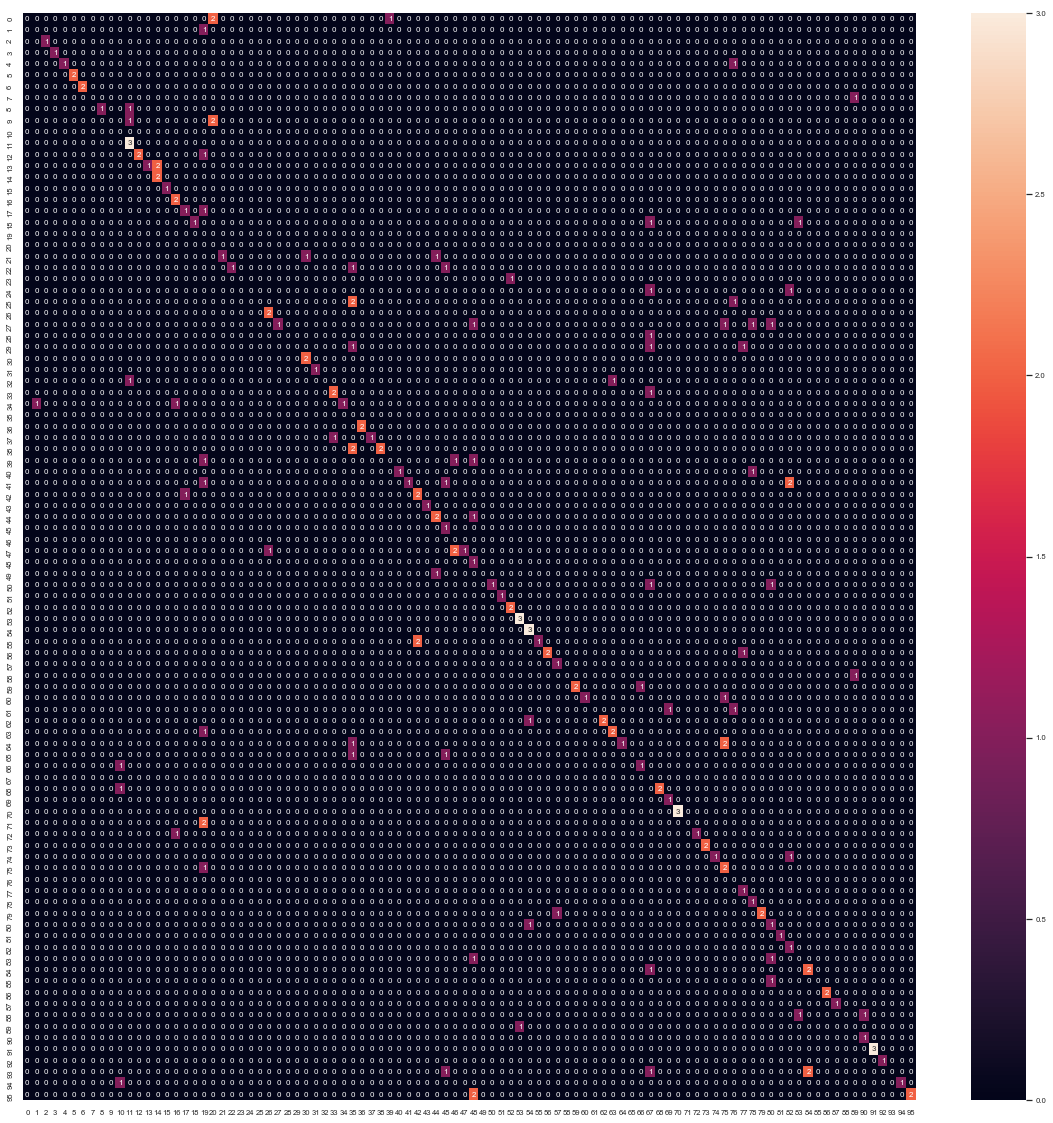

In [67]:
cf3 = pd.DataFrame(svc_cfmat, range(92), range(92))
fig, ax = plt.subplots(figsize=(20,20))
sn.set(font_scale=0.7)
sn.heatmap(cf1, annot=True,annot_kws={"size": 8},ax = ax)

## Random Forest Confusion Matrix

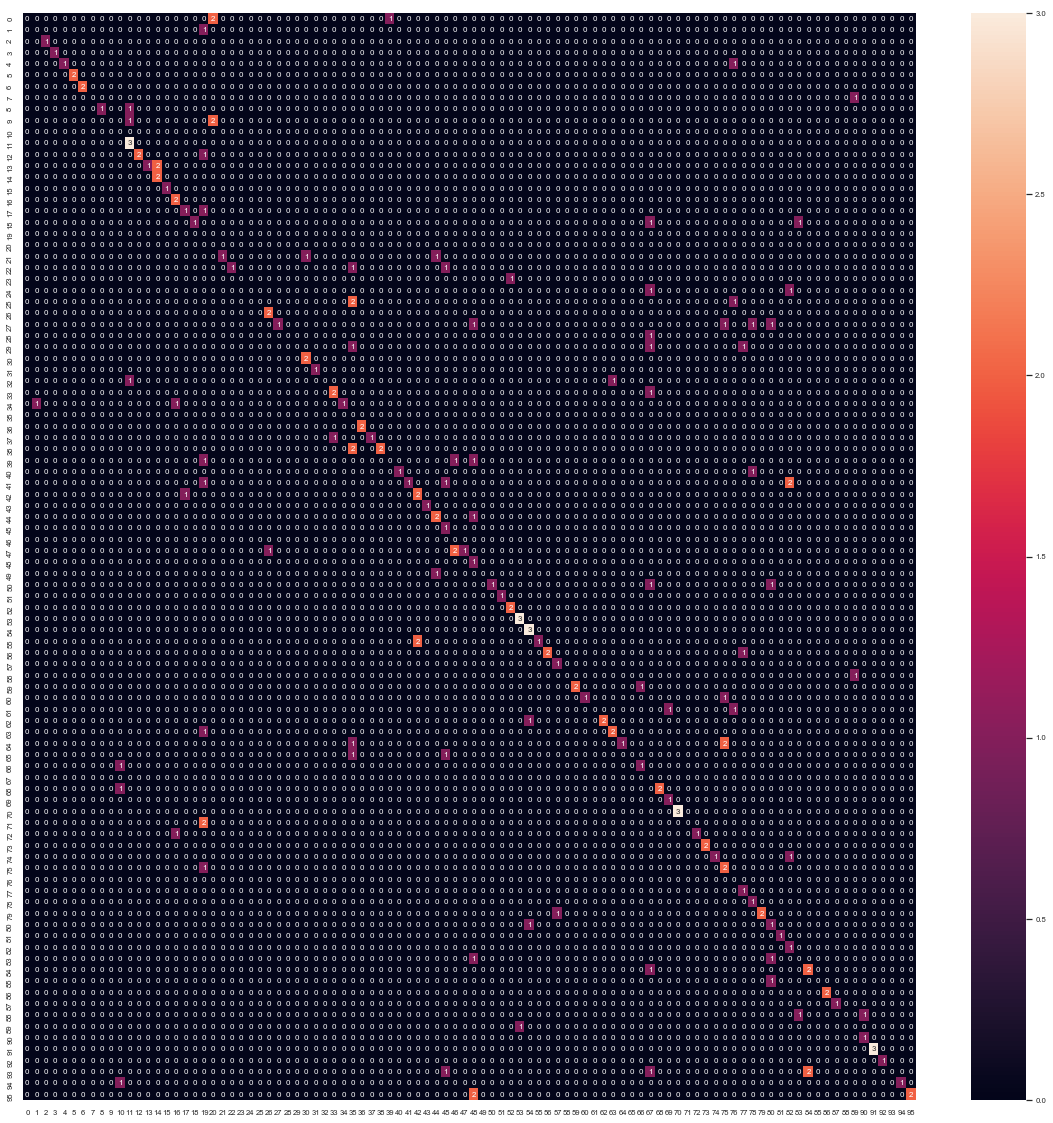

In [69]:
cf4 = pd.DataFrame(rf_cfmat, range(94), range(94))
fig, ax = plt.subplots(figsize=(20,20))
sn.set(font_scale=0.7)
sn.heatmap(cf1, annot=True,annot_kws={"size": 8},ax = ax)

So, here we see that Random Forest Classifier gives us the maximum accuracy. The number of decision trees used to make the Random Forest Model are 11. Let's do an experiment. Let us vary the number of decision trees used by Random Forest Classifier and see how accuracy varies with it.

In [70]:
import time
test_df = []
for i in range(1,152,5):
    start = time.time()
    rfc = RandomForestClassifier(n_estimators = i)
    pred_rfc = rfc.fit(x_train, y_train).predict(x_test)
    a_score = accuracy_score(y_test, pred_rfc, normalize = True)
    end = time.time()
    d = {
        'No. of Decision Trees' : i,
        'Accuracy Score' : a_score,
        'Time Taken' : end - start
    }
    test_df.append(d)
accuracy_chart = pd.DataFrame(test_df)
accuracy_chart

,Accuracy Score,No. of Decision Trees,Time Taken
0,0.489899,1,0.017952
1,0.782828,6,0.075871
2,0.858586,11,0.119295
3,0.924242,16,0.166802
4,0.909091,21,0.226855
5,0.919192,26,0.273051
6,0.944444,31,0.339543
7,0.924242,36,0.390518
8,0.964646,41,0.446454
9,0.944444,46,0.480349


Thus, we can see that Random Forest Classifier with more than 100 decision trees gives a very high accuracy on our test set. But the downside is the time required to fit and train our model. A good trade-off is one which requires less time and gives an acceptable accuracy. From the chart above, we see this is the case with No. of Decision Trees = 81. Here the time taken is less than 1 second and accuracy is as high as 0.964646.